In [1]:
import pandas as pd
import numpy as np
from pyproj import Proj, transform
from shapely.ops import unary_union
import geopandas as gpd

In [2]:
index = pd.read_excel("OneEnergyTurbineData.xlsx")
index["ProjectID"] = index["APRS ID"].apply(lambda x: x[:2])
index

,APRS ID,Public Site Name,State,Model,Rotor Diameter (m),Latitude,Longitude,Hub Height (m),Rating (kW),ProjectID
0,p1w1,Findlay,OH,GW 87/1500,87,41.101219,-83.644394,80,1500,p1
1,p1w2,Findlay,OH,GW 87/1500,87,41.099750,-83.643533,80,1500,p1
2,p1z1,Findlay,OH,GW 87/1500,87,41.097669,-83.642588,80,1500,p1
3,p1z2,Findlay,OH,GW 87/1500,87,41.096111,-83.641380,80,1500,p1
4,p1z3,Findlay,OH,GW 87/1500,87,41.094388,-83.639116,80,1500,p1
5,p1z4,Findlay,OH,GW 87/1500,87,41.093078,-83.637777,80,1500,p1
6,p1z5,Findlay,OH,GW 87/1500,87,41.091914,-83.636667,80,1500,p1
7,p1z6,Findlay,OH,GW 87/1500,87,41.088398,-83.636596,80,1500,p1
8,p1v1,Findlay,OH,GW 87/1500,87,41.082611,-83.643975,80,1500,p1
9,p1v2,Findlay,OH,GW 87/1500,87,41.084658,-83.644558,80,1500,p1


/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

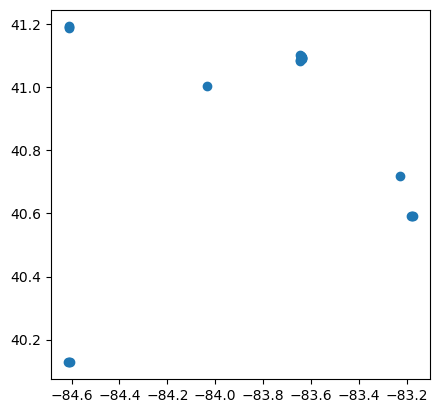

In [3]:
gdf = gpd.GeoDataFrame(index, geometry=gpd.points_from_xy(index.Longitude, index.Latitude), crs="EPSG:4326")
gdf.geometry.plot()

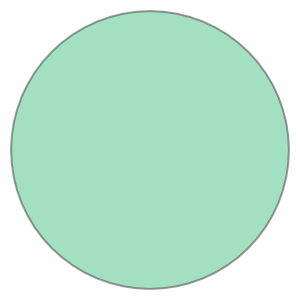

In [4]:
gdf.to_crs('epsg:3857')['geometry'][0].buffer(1500)

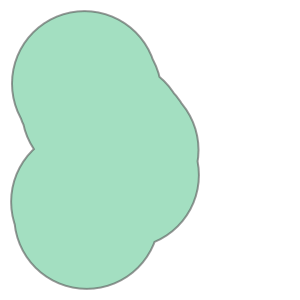

In [5]:
all_buffers = gpd.GeoDataFrame(geometry=[unary_union([p.buffer(1500) for p in grp.to_crs('epsg:3857')['geometry']]) for pid, grp in gdf.groupby("ProjectID")])
all_buffers["geometry"][0]

In [6]:
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
x1,y1 = -11705274.6374,4826473.6922
x1p,y1p = transform(inProj,outProj,x1,y1)

for idx, row in all_buffers.iterrows():
    xx, yy = row.geometry.exterior.coords.xy
    #print(np.min(xx), np.max(xx), np.min(yy), np.max(yy))
    
    x1p,y1p = transform(inProj,outProj,np.min(xx),np.min(yy))
    x2p,y2p = transform(inProj,outProj,np.max(xx),np.max(yy))
    print(x1p, y1p, x2p, y2p)

/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' 

-83.6580327292618 41.072453464594396 -83.62312127073821 41.111372089304
-84.6286457292618 40.1173863062157 -84.5947452707382 40.13820809942235
-83.2421247292618 40.70807636714546 -83.21517527073821 40.72850206603638
-83.19556672926178 40.580539829794084 -83.1614662707382 40.60178648478805
-84.04721672926179 40.99259413467828 -84.0202672707382 41.01293229623797
-84.62634972926178 41.17731368448959 -84.5993662707382 41.202517982399364


In [9]:
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
x1,y1 = -11705274.6374,4826473.6922
x1p,y1p = transform(inProj,outProj,x1,y1)

for idx, row in all_buffers.iterrows():
    xx, yy = row.geometry.exterior.coords.xy
    #print(np.min(xx), np.max(xx), np.min(yy), np.max(yy))
    
    x1p,y1p = transform(inProj,outProj,np.min(xx),np.min(yy))
    x2p,y2p = transform(inProj,outProj,np.max(xx),np.max(yy))
    #print(x1p, y1p, x2p, x2p)
    
    # Format of the desired queries:
    # https://data.3dbuildings.com/download.json?token={token}&bbox={w},{s},{e},{n},
    print("https://data.3dbuildings.com/download.json?token={token}&bbox={%f},{%f},{%f},{%f}" % \
         (x1p, y1p, x2p, y2p))
    

/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' 

https://data.3dbuildings.com/download.json?token={token}&bbox={-83.658033},{41.072453},{-83.623121},{41.111372}
https://data.3dbuildings.com/download.json?token={token}&bbox={-84.628646},{40.117386},{-84.594745},{40.138208}
https://data.3dbuildings.com/download.json?token={token}&bbox={-83.242125},{40.708076},{-83.215175},{40.728502}
https://data.3dbuildings.com/download.json?token={token}&bbox={-83.195567},{40.580540},{-83.161466},{40.601786}
https://data.3dbuildings.com/download.json?token={token}&bbox={-84.047217},{40.992594},{-84.020267},{41.012932}
https://data.3dbuildings.com/download.json?token={token}&bbox={-84.626350},{41.177314},{-84.599366},{41.202518}
